In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd

# Load dataset from Google Drive
file_path = '/content/drive/MyDrive/EmotionProject/Dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows to check the data
df.head()


,0.349199364,0.283633103,0.332759378,0.216878588,0.428060935,0.307375704,0.464030157,0.47700433,0.37955888,0.555433419,0
0,0.311972,0.203816,0.327639,0.225092,0.308788,0.248257,0.379399,0.293015,0.404383,0.451443,0
1,0.310054,0.200216,0.328004,0.224183,0.309334,0.247905,0.377769,0.290631,0.401430,0.449153,0
2,0.311457,0.203679,0.328945,0.224877,0.311774,0.248453,0.380679,0.290603,0.402368,0.450308,0
3,0.310568,0.198933,0.320973,0.215203,0.308446,0.247227,0.377342,0.288206,0.401431,0.448102,0
4,0.311817,0.203123,0.319028,0.215467,0.310794,0.247967,0.378622,0.289461,0.404271,0.449131,0


In [2]:
# Drop rare classes (those with less than 2 samples)
class_counts = df.iloc[:, -1].value_counts()  # Get the count of each class in the last column
df = df[df.iloc[:, -1].isin(class_counts[class_counts >= 2].index)]  # Keep only classes with >= 2 samples

# Check the dataset after filtering rare classes
df.head()


,0.349199364,0.283633103,0.332759378,0.216878588,0.428060935,0.307375704,0.464030157,0.47700433,0.37955888,0.555433419,0
0,0.311972,0.203816,0.327639,0.225092,0.308788,0.248257,0.379399,0.293015,0.404383,0.451443,0
1,0.310054,0.200216,0.328004,0.224183,0.309334,0.247905,0.377769,0.290631,0.401430,0.449153,0
2,0.311457,0.203679,0.328945,0.224877,0.311774,0.248453,0.380679,0.290603,0.402368,0.450308,0
3,0.310568,0.198933,0.320973,0.215203,0.308446,0.247227,0.377342,0.288206,0.401431,0.448102,0
4,0.311817,0.203123,0.319028,0.215467,0.310794,0.247967,0.378622,0.289461,0.404271,0.449131,0


In [3]:
# Separate features (X) and target (y)
X = df.iloc[:, :-1].values  # Features (everything except the last column)
y = df.iloc[:, -1].values   # Target (the last column)

# Display the shape of X and y
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (190966, 10)
Target shape: (190966,)


In [4]:
import numpy as np  # Make sure this line is included

from sklearn.preprocessing import LabelEncoder

# Encode target labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display the encoded labels
print("Encoded labels:", np.unique(y_encoded))


Encoded labels: [0 1 2 3 4 5]


In [5]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the first few rows of the scaled features
print("Normalized features:\n", X_scaled[:5])


Normalized features:
 [[-0.87360008 -0.92953387 -0.75617559 -0.82531066 -0.70440938 -0.71015689
   0.13532011 -1.17264169 -0.01555402 -0.28066786]
 [-0.88038403 -0.94009092 -0.75455846 -0.82867979 -0.70108043 -0.7127738
   0.12918482 -1.18636501 -0.03162558 -0.29277869]
 [-0.87542084 -0.9299356  -0.75039207 -0.82610483 -0.68618656 -0.70870215
   0.14013889 -1.18652819 -0.0265193  -0.28667193]
 [-0.87856478 -0.94385292 -0.78569843 -0.86198683 -0.70649731 -0.71781222
   0.12758075 -1.2003225  -0.03162021 -0.29834009]
 [-0.87414816 -0.93156613 -0.79431183 -0.86100826 -0.69217256 -0.71230924
   0.13239747 -1.1930989  -0.01616177 -0.29289674]]


In [6]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Check the shapes of the resulting splits
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (152772, 10)
Testing data shape: (38194, 10)


In [7]:
import numpy as np

# Define the Gaussian activation function
def gaussian_activation(x):
    return np.exp(-x**2)

# # Define the Sigmoid activation function
# def sigmoid_activation(x):
#     return 1 / (1 + np.exp(-x))

# # Define the Hardlim (Hard limit) activation function
# def tanh_activation(x):
#     return np.tanh(x)

# ELM Class
class ELM:
    def __init__(self, input_dim, hidden_neurons, output_dim, activation_func):
        # Initialize the ELM with random weights and biases
        self.input_weights = np.random.randn(input_dim, hidden_neurons)
        self.biases = np.random.randn(hidden_neurons)
        self.hidden_neurons = hidden_neurons
        self.output_dim = output_dim
        self.activation_func = activation_func  # Choose activation function

    def fit(self, X, y):
        # Apply the selected activation to the hidden layer
        H = self.activation_func(np.dot(X, self.input_weights) + self.biases)
        Y = np.zeros((X.shape[0], self.output_dim))  # One-hot encoding
        for i in range(X.shape[0]):
            Y[i, y[i]] = 1  # Assign the target class to the appropriate index
        reg = 1e-5  # Regularization term
        H_T = H.T
        # Calculate the output weights
        self.output_weights = np.linalg.inv(H_T @ H + reg * np.identity(H.shape[1])) @ H_T @ Y

    def predict(self, X):
        # Predict by applying the selected activation function
        H = self.activation_func(np.dot(X, self.input_weights) + self.biases)
        output = np.dot(H, self.output_weights)
        return np.argmax(output, axis=1)  # Return the index of the maximum value


In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np

# Modified function to work with cross-validation (no X_train/X_test splitting inside)
def evaluate_model_cv(activation_func, activation_func_name, X, y, label_encoder, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_accuracies = []

    print(f"\n===== Evaluating {activation_func_name} activation with {n_splits}-fold CV =====")

    for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Initialize and train model
        elm = ELM(input_dim=X_train.shape[1], hidden_neurons=2000,
                  output_dim=len(np.unique(y_encoded)), activation_func=activation_func)
        elm.fit(X_train, y_train)
        y_pred = elm.predict(X_test)

        # Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(accuracy)

        # Active labels and target names
        active_labels = unique_labels(y_test, y_pred)
        target_names = [str(label_encoder.inverse_transform([i])[0]) for i in active_labels]

        print(f"\nFold {fold} Accuracy: {accuracy:.2f}")
        print("Classification Report:\n", classification_report(y_test, y_pred, labels=active_labels, target_names=target_names, zero_division=0))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred, labels=active_labels))

        # Per-class accuracy
        print("Per-Class Accuracy:")
        for i, label_idx in enumerate(active_labels):
            class_name = label_encoder.inverse_transform([label_idx])[0]
            true_indices = (y_test == label_idx)
            correct = np.sum(y_pred[true_indices] == y_test[true_indices])
            total = np.sum(true_indices)
            class_acc = correct / total if total > 0 else 0
            print(f"{class_name}: {class_acc:.2f}")

    print(f"\nAverage Accuracy over {n_splits} folds: {np.mean(fold_accuracies):.4f}")

# Call the function with each activation function
evaluate_model_cv(gaussian_activation, "Gaussian", X_scaled, y_encoded, label_encoder)
evaluate_model_cv(sigmoid_activation, "Sigmoid", X_scaled, y_encoded, label_encoder)
evaluate_model_cv(tanh_activation, "Tanh", X_scaled, y_encoded, label_encoder)



===== Evaluating Gaussian activation with 5-fold CV =====

Fold 1 Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      6439
           1       0.89      0.85      0.87      6348
           2       0.85      0.88      0.87      6294
           3       0.89      0.89      0.89      6131
           4       0.91      0.92      0.92      6472
           5       0.92      0.89      0.90      6510

    accuracy                           0.88     38194
   macro avg       0.89      0.88      0.88     38194
weighted avg       0.89      0.88      0.88     38194

Confusion Matrix:
 [[5663  148  243  147  131  107]
 [ 273 5399  179  150  200  147]
 [ 249  124 5559  179   54  129]
 [ 202  122  271 5433   45   58]
 [ 151  112   80   85 5958   86]
 [ 170  135  179   90  158 5778]]
Per-Class Accuracy:
0: 0.88
1: 0.85
2: 0.88
3: 0.89
4: 0.92
5: 0.89

Fold 2 Accuracy: 0.89
Classification Report:
               prec

NameError: name 'sigmoid_activation' is not defined

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# ------- Step 1: Normalize features -------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------- Step 2: Clustering -------
num_clusters = 5  # Changeable
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# ------- Step 3: Train ELM per cluster -------
cluster_results = []

for cluster_id in range(num_clusters):
    idx = np.where(cluster_labels == cluster_id)[0]
    X_cluster = X[idx]
    y_cluster = y[idx]

    if len(X_cluster) < 100:
        print(f"Skipping small cluster {cluster_id} with {len(X_cluster)} samples.")
        continue

    X_train, X_test, y_train, y_test = train_test_split(
        X_cluster, y_cluster, test_size=0.2, random_state=42
    )

    activation_function = gaussian_activation  # Replace if needed
    num_hidden_neurons = 2000

    elm = ELM(input_dim=X_train.shape[1],
              hidden_neurons=num_hidden_neurons,
              output_dim=len(np.unique(y)),
              activation_func=activation_function)

    elm.fit(X_train, y_train)
    y_pred = elm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    cluster_results.append({
        'Cluster': cluster_id,
        'Samples': len(X_cluster),
        'Accuracy': acc
    })

# ------- Step 4: Display results -------
results_df = pd.DataFrame(cluster_results)
results_df['Weighted'] = results_df['Samples'] * results_df['Accuracy']
weighted_avg = results_df['Weighted'].sum() / results_df['Samples'].sum()

print("\nCluster Performance Summary:")
print(results_df[['Cluster', 'Samples', 'Accuracy']].to_string(index=False))
print(f"\nWeighted Average Accuracy: {weighted_avg:.4f}")



Cluster Performance Summary:
 Cluster  Samples  Accuracy
       0    40744  0.643024
       1    53410  0.999064
       2    18407  0.987507
       3    19173  0.711343
       4    59232  0.998396

Weighted Average Accuracy: 0.8929


In [10]:
!pip install pyswarms

In [13]:
from sklearn.metrics import pairwise_distances_argmin_min
from pyswarms.single.global_best import GlobalBestPSO
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

# ---------- Step 0: Set Random Seeds for Reproducibility ----------
np.random.seed(42)  # Fix numpy random seed
random_seed = 42    # For other random operations

# ---------- Step 1: Normalize ----------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------- Step 2: PSO to optimize cluster centers ----------
k = 5  # number of clusters
n_particles = 30
dimensions = X.shape[1] * k  # each particle has k cluster centers

def pso_objective(centers_flat):
    centers = centers_flat.reshape((k, X.shape[1]))
    closest_clusters, _ = pairwise_distances_argmin_min(X_scaled, centers)

    # Compute intra-cluster distance (to minimize)
    total_distance = 0
    for i in range(k):
        cluster_points = X_scaled[closest_clusters == i]
        if len(cluster_points) > 0:
            dists = np.linalg.norm(cluster_points - centers[i], axis=1)
            total_distance += np.sum(dists)
    return total_distance / len(X_scaled)

# Create optimizer with fixed initialization
init_pos = np.random.RandomState(random_seed).rand(n_particles, dimensions)
optimizer = GlobalBestPSO(n_particles=n_particles,
                         dimensions=dimensions,
                         options={'c1': 1.5, 'c2': 1.7, 'w': 0.6},
                         init_pos=init_pos)

# Perform optimization with 100 iterations
best_cost, best_pos = optimizer.optimize(lambda x: np.array([pso_objective(p) for p in x]), iters=150)

# Reshape best cluster centers
optimized_centers = best_pos.reshape((k, X.shape[1]))

# ---------- Step 3: Assign clusters using KMeans with fixed centers ----------
kmeans = KMeans(n_clusters=k,
                init=optimized_centers,  # Use PSO's centers as initial points
                n_init=1,                # Single initialization (since we provide centers)
                random_state=random_seed)
cluster_labels = kmeans.fit_predict(X_scaled)

# ---------- Step 4: Train ELM per cluster ----------
cluster_results = []

for cluster_id in range(k):
    idx = np.where(cluster_labels == cluster_id)[0]
    X_cluster = X[idx]
    y_cluster = y[idx]

    if len(X_cluster) < 100:
        print(f"Skipping small cluster {cluster_id} with {len(X_cluster)} samples.")
        continue

    # Use fixed random state for train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X_cluster, y_cluster, test_size=0.2, random_state=random_seed
    )

    activation_function = gaussian_activation  # Can try sigmoid_activation or tanh_activation
    num_hidden_neurons = 2000

    elm = ELM(input_dim=X_train.shape[1],
              hidden_neurons=num_hidden_neurons,
              output_dim=len(np.unique(y)),
              activation_func=activation_function)

    elm.fit(X_train, y_train)
    y_pred = elm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    cluster_results.append({
        'Cluster': cluster_id,
        'Samples': len(X_cluster),
        'Accuracy': acc
    })

# ---------- Step 5: Display results ----------
results_df = pd.DataFrame(cluster_results)
results_df['Weighted'] = results_df['Samples'] * results_df['Accuracy']
weighted_avg = results_df['Weighted'].sum() / results_df['Samples'].sum()

print("\n[PSO + KMeans] Cluster Performance Summary:")
print(results_df[['Cluster', 'Samples', 'Accuracy']].to_string(index=False))
print(f"\nWeighted Average Accuracy: {weighted_avg:.4f}")

2025-05-11 20:41:42,825 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 1.5, 'c2': 1.7, 'w': 0.6}
pyswarms.single.global_best: 100%|██████████|150/150, best_cost=1.61
2025-05-11 20:47:35,207 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.6052146000655334, best pos: [-0.88799147 -0.9003736  -0.91696177 -0.89368949 -0.23871137 -0.56178451
  0.30594005 -0.53665602 -0.0268256   0.17957103 -0.26113465  0.52315995
  2.37698486 -6.67468235  1.97956969 -1.41806915  0.25131693 -0.30609976
  0.9022568  -0.69350277 -0.22000228 -0.6295392  -0.34071259  1.40541733
 -0.17692775 -0.66049517 -0.31768799 -1.08412586  0.72550628 -2.04477579
  1.34541262  1.33630201  1.29020372  1.31256829 -0.68695636 -0.071627
 -1.33129949 -0.08260099 -0.81978723 -1.08940153 -0.16336087 -0.10763874
  0.0996507  -0.10135513  0.90869416  0.53571246  1.00917941  0.57989115
  0.86676025  0.94341639]



[PSO + KMeans] Cluster Performance Summary:
 Cluster  Samples  Accuracy
       0    58492  0.998376
       1    17089  0.972206
       2    15849  1.000000
       3    58131  0.622001
       4    41405  0.991426

Weighted Average Accuracy: 0.8801


In [14]:
# ---------- Step 4 (Updated): Merge clusters 0,1,2,4 as Cluster A, and keep cluster 3 as Cluster B ----------
# Define merged clusters
cluster_A_ids = [0, 1, 2, 4]
cluster_B_id = 3

# Create masks
cluster_A_mask = np.isin(cluster_labels, cluster_A_ids)
cluster_B_mask = (cluster_labels == cluster_B_id)

# Prepare datasets
X_A, y_A = X[cluster_A_mask], y[cluster_A_mask]
X_B, y_B = X[cluster_B_mask], y[cluster_B_mask]

cluster_results = []

for label, (X_cluster, y_cluster) in zip(['Merged (0,1,2,4)', 'Cluster 3'], [(X_A, y_A), (X_B, y_B)]):
    print(f"\nTraining on: {label} with {len(X_cluster)} samples")

    if len(X_cluster) < 100:
        print(f"Skipping small cluster {label} with {len(X_cluster)} samples.")
        continue

    X_train, X_test, y_train, y_test = train_test_split(
        X_cluster, y_cluster, test_size=0.2, random_state=random_seed
    )

    activation_function = gaussian_activation
    num_hidden_neurons = 2000

    elm = ELM(input_dim=X_train.shape[1],
              hidden_neurons=num_hidden_neurons,
              output_dim=len(np.unique(y)),
              activation_func=activation_function)

    elm.fit(X_train, y_train)
    y_pred = elm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    cluster_results.append({
        'Cluster': label,
        'Samples': len(X_cluster),
        'Accuracy': acc
    })

results_df = pd.DataFrame(cluster_results)
results_df['Weighted'] = results_df['Samples'] * results_df['Accuracy']
weighted_avg = results_df['Weighted'].sum() / results_df['Samples'].sum()

print("\n[PSO + KMeans] Merged Cluster Performance Summary:")
print(results_df[['Cluster', 'Samples', 'Accuracy']].to_string(index=False))
print(f"\nWeighted Average Accuracy (Merged): {weighted_avg:.4f}")


Training on: Merged (0,1,2,4) with 132835 samples

Training on: Cluster 3 with 58131 samples


In [15]:
results_df = pd.DataFrame(cluster_results)
results_df['Weighted'] = results_df['Samples'] * results_df['Accuracy']
weighted_avg = results_df['Weighted'].sum() / results_df['Samples'].sum()

print("\n[PSO + KMeans] Merged Cluster Performance Summary:")
print(results_df[['Cluster', 'Samples', 'Accuracy']].to_string(index=False))
print(f"\nWeighted Average Accuracy (Merged): {weighted_avg:.4f}")



[PSO + KMeans] Merged Cluster Performance Summary:
         Cluster  Samples  Accuracy
Merged (0,1,2,4)   132835  0.991531
       Cluster 3    58131  0.618388

Weighted Average Accuracy (Merged): 0.8779


In [16]:
# ========== CLUSTER 3 (STANDALONE) ==========
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# --- Step 1: Extract Cluster 3 Data ---
cluster_B_id = 3  # Your target cluster
cluster_B_mask = (cluster_labels == cluster_B_id)  # Use your existing cluster_labels
X_B, y_B = X[cluster_B_mask], y[cluster_B_mask]   # Original unscaled data

print(f"Cluster 3 shape: {X_B.shape}, Classes: {np.unique(y_B)}")

# --- Step 2: Train/Test Split ---
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(
    X_B, y_B,
    test_size=0.2,
    random_state=42
)

# --- Step 3: Train RandomForest ---
rf = RandomForestClassifier(
    n_estimators=200,        # More trees = better stability
    max_depth=15,            # Limit depth to prevent overfitting
    min_samples_split=5,     # Reduce overfitting on small leaves
    class_weight='balanced', # Critical if class imbalance exists
    random_state=42,
    n_jobs=-1               # Use all CPU cores
)

rf.fit(X_train_B, y_train_B)

# --- Step 4: Evaluate ---
y_pred_B = rf.predict(X_test_B)
acc_B = accuracy_score(y_test_B, y_pred_B)

# --- Step 5: Feature Importance Analysis (Diagnostics) ---
importances = rf.feature_importances_
top_features = np.argsort(importances)[-10:]  # Top 10 important features

print("\n=== Cluster 3 (RandomForest) Results ===")
print(f"Accuracy: {acc_B:.4f}")
print(f"Class distribution (train): {pd.Series(y_train_B).value_counts().to_dict()}")
print(f"Top 10 important features: {top_features}")

# --- Optional: Save Model ---
# import joblib
# joblib.dump(rf, 'cluster3_randomforest.joblib')

Cluster 3 shape: (58131, 10), Classes: [0 1 2 3 4 5]

=== Cluster 3 (RandomForest) Results ===
Accuracy: 0.7851
Class distribution (train): {0: 8413, 4: 8228, 1: 7780, 2: 7541, 5: 7486, 3: 7056}
Top 10 important features: [6 1 0 3 2 4 5 8 7 9]


[0]	validation_0-mlogloss:1.71484
[1]	validation_0-mlogloss:1.64445
[2]	validation_0-mlogloss:1.58659
[3]	validation_0-mlogloss:1.53537
[4]	validation_0-mlogloss:1.48776
[5]	validation_0-mlogloss:1.45063
[6]	validation_0-mlogloss:1.41289
[7]	validation_0-mlogloss:1.37527
[8]	validation_0-mlogloss:1.34326
[9]	validation_0-mlogloss:1.31573
[10]	validation_0-mlogloss:1.28799
[11]	validation_0-mlogloss:1.26295
[12]	validation_0-mlogloss:1.23874
[13]	validation_0-mlogloss:1.21678
[14]	validation_0-mlogloss:1.19651
[15]	validation_0-mlogloss:1.17721
[16]	validation_0-mlogloss:1.15803
[17]	validation_0-mlogloss:1.13955
[18]	validation_0-mlogloss:1.12281
[19]	validation_0-mlogloss:1.10805
[20]	validation_0-mlogloss:1.09406
[21]	validation_0-mlogloss:1.07977
[22]	validation_0-mlogloss:1.06714
[23]	validation_0-mlogloss:1.05332
[24]	validation_0-mlogloss:1.04218
[25]	validation_0-mlogloss:1.03156
[26]	validation_0-mlogloss:1.01920
[27]	validation_0-mlogloss:1.00881
[28]	validation_0-mlogloss:0.9

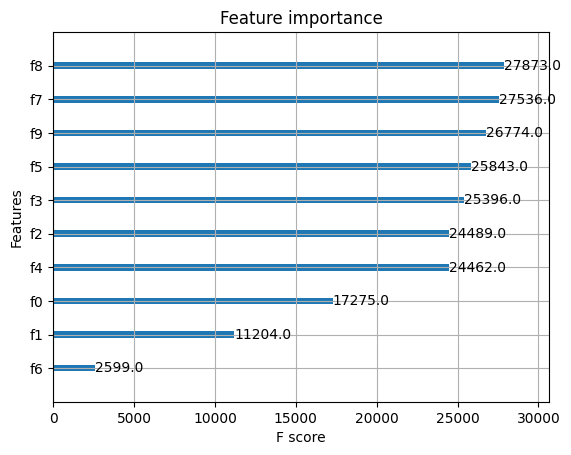

In [17]:
# ========== CLUSTER 3 (XGBoost) ==========
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# --- Step 1: Extract Cluster 3 Data ---
cluster_B_id = 3
cluster_B_mask = (cluster_labels == cluster_B_id)
X_B, y_B = X[cluster_B_mask], y[cluster_B_mask]

# XGBoost requires labels starting from 0
le = LabelEncoder()
y_B_encoded = le.fit_transform(y_B)

# --- Step 2: Train/Test Split ---
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(
    X_B, y_B_encoded,
    test_size=0.2,
    random_state=42
)

# --- Step 3: Compute Class Weights (Critical for XGBoost) ---
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight('balanced', y_train_B)

# --- Step 4: Train XGBoost ---
xgb = XGBClassifier(
    n_estimators=300,               # More trees than RF (XGBoost needs less)
    max_depth=8,                    # Shallower trees (XGBoost is more powerful)
    learning_rate=0.1,              # Default, can tune between 0.01-0.2
    subsample=0.8,                  # Random subset of samples per tree
    colsample_bytree=0.8,           # Random subset of features per tree
    objective='multi:softmax',      # For multi-class
    num_class=len(np.unique(y_B)),  # Number of classes
    tree_method='hist',             # Faster training ('hist' for large datasets)
    eval_metric='mlogloss',         # Metric for early stopping
    early_stopping_rounds=10,       # Stop if no improvement
    random_state=42,
    n_jobs=-1
)

# Train with sample weights
xgb.fit(
    X_train_B,
    y_train_B,
    sample_weight=sample_weights,
    eval_set=[(X_test_B, y_test_B)],
    verbose=True
)

# --- Step 5: Evaluate ---
y_pred_B = xgb.predict(X_test_B)
acc_B = accuracy_score(y_test_B, y_pred_B)

# --- Step 6: Feature Importance ---
importance = xgb.feature_importances_
top_features = np.argsort(importance)[-10:]  # Top 10 features

print("\n=== Cluster 3 (XGBoost) Results ===")
print(f"Accuracy: {acc_B:.4f}")
print(f"Class distribution: {pd.Series(y_B).value_counts().to_dict()}")
print(f"Top 10 important features: {top_features}")

# Plot feature importance (optional)
from xgboost import plot_importance
import matplotlib.pyplot as plt
plot_importance(xgb, max_num_features=10)
plt.show()

Training completed in 1.1 minutes

=== Final Evaluation ===
Optimized Accuracy: 0.8417

Detailed Classification Report:
              precision    recall  f1-score   support

     Class 0       0.83      0.82      0.82      2128
     Class 1       0.82      0.79      0.81      1862
     Class 2       0.81      0.84      0.82      1838
     Class 3       0.88      0.86      0.87      1816
     Class 4       0.86      0.89      0.88      2038
     Class 5       0.85      0.85      0.85      1945

    accuracy                           0.84     11627
   macro avg       0.84      0.84      0.84     11627
weighted avg       0.84      0.84      0.84     11627



<Figure size 1200x800 with 0 Axes>

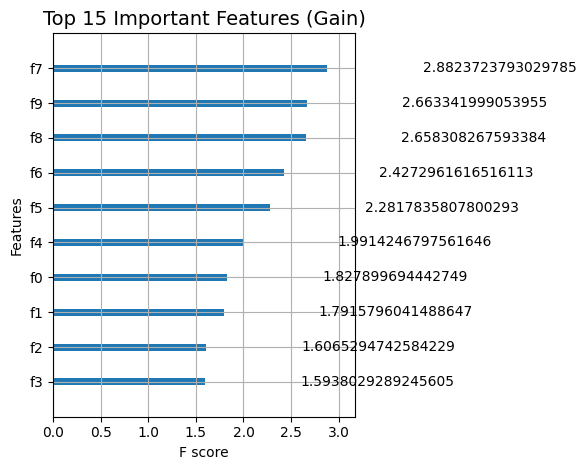


Model saved as 'cluster3_xgboost_model.joblib'


In [25]:
# ========== WORKING XGBOOST FOR CLUSTER 3 ==========
import numpy as np
import pandas as pd
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

# --- Step 1: Data Preparation ---
print("Preparing data...")
cluster_B_id = 3
cluster_B_mask = (cluster_labels == cluster_B_id)
X_B, y_B = X[cluster_B_mask], y[cluster_B_mask]

# Encode labels
le = LabelEncoder()
y_B_encoded = le.fit_transform(y_B)
class_names = le.classes_

# Train-test split
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(
    X_B, y_B_encoded,
    test_size=0.2,
    random_state=42
)

# --- Step 2: Class Weight Calculation ---
class_dist = pd.Series(y_B).value_counts().sort_index()
print("\nClass Distribution:\n", class_dist)

# Automatic balanced weights
sample_weights = compute_sample_weight('balanced', y_train_B)

# --- Step 3: Configure XGBoost ---
xgb = XGBClassifier(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=len(class_names),
    tree_method='hist',
    eval_metric='merror',
    early_stopping_rounds=20,
    random_state=42,
    n_jobs=-1
)

# --- Step 4: Training with Manual Monitoring ---
print("\nStarting training...")
start_time = time.time()

try:
    # For Google Colab (uncomment if needed)
    # from google.colab import output
    # output.eval_js('google.colab.kernel.keepAlive()')

    xgb.fit(
        X_train_B,
        y_train_B,
        sample_weight=sample_weights,
        eval_set=[(X_test_B, y_test_B)],
        verbose=True  # Shows progress automatically
    )

    # Manual progress monitoring
    elapsed = (time.time() - start_time)/60
    clear_output(wait=True)
    print(f"Training completed in {elapsed:.1f} minutes")

except Exception as e:
    print(f"\nTraining interrupted by error: {str(e)}")

# --- Step 5: Evaluation ---
if hasattr(xgb, 'best_iteration'):  # Check if model was trained
    y_pred_B = xgb.predict(X_test_B)
    acc_B = accuracy_score(y_test_B, y_pred_B)

    print("\n=== Final Evaluation ===")
    print(f"Optimized Accuracy: {acc_B:.4f}")
    print("\nDetailed Classification Report:")
    print(classification_report(
        y_test_B,
        y_pred_B,
        target_names=[f"Class {name}" for name in class_names]
    ))

    # --- Step 6: Feature Analysis ---
    plt.figure(figsize=(12, 8))
    plot_importance(xgb, max_num_features=15, importance_type='gain')
    plt.title("Top 15 Important Features (Gain)", fontsize=14)
    plt.tight_layout()
    plt.show()

    # --- Step 7: Model Persistence ---
    import joblib
    joblib.dump(xgb, 'cluster3_xgboost_model.joblib')
    print("\nModel saved as 'cluster3_xgboost_model.joblib'")
else:
    print("\nModel was not properly trained. Check for errors above.")

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# Step 1: Extract cluster 0 samples
idx_c0 = np.where(cluster_labels == 0)[0]
X_c0 = X[idx_c0]
y_c0 = y[idx_c0]

# Step 2: Train-test split on cluster 0
X_train_c0, X_test_c0, y_train_c0, y_test_c0 = train_test_split(
    X_c0, y_c0, test_size=0.2, random_state=42)

# Step 3: Ensemble training
n_models = 5
ensemble_preds = []

for i in range(n_models):
    # Bootstrap sample from training data
    X_boot, y_boot = resample(X_train_c0, y_train_c0, random_state=i)

    elm = ELM(input_dim=X_boot.shape[1],
              hidden_neurons=3000,  # Increased capacity
              output_dim=len(np.unique(y)),
              activation_func=gaussian_activation)  # You may try others

    elm.fit(X_boot, y_boot)
    y_pred = elm.predict(X_test_c0)
    ensemble_preds.append(y_pred)

# Step 4: Majority voting (corrected)
ensemble_preds = np.array(ensemble_preds)
final_pred = mode(ensemble_preds, axis=0).mode[0].flatten()

# Step 5: Accuracy
ensemble_acc = accuracy_score(y_test_c0, final_pred)
print(f"\nEnsemble Accuracy on Cluster 0 (n={len(y_test_c0)}): {ensemble_acc:.4f}")



ValueError: Found input variables with inconsistent numbers of samples: [11291, 1]